# Data Science Challenge 2024 task two

Building off of the first task, I will now be doing multiclass classification of different types of abnormal heartbeats.

The classes are 
 - Non-ectopic: 0
 - Supraventricular: 1
 - Ventricle ectopic: 2
 - Fusion beats: 3
 - Unknown beats: 4


In [175]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train_set_filepath = './dsc_onetwo/mitbih_train.csv'
test_set_filepath = './dsc_onetwo/mitbih_test.csv'
train_df = pd.read_csv(train_set_filepath, header = None)
test_df = pd.read_csv(test_set_filepath, header = None)
df.shape

(87554, 188)

# Visualizations:

ValueError: x and y must have same first dimension, but have shapes (187,) and (5, 187)

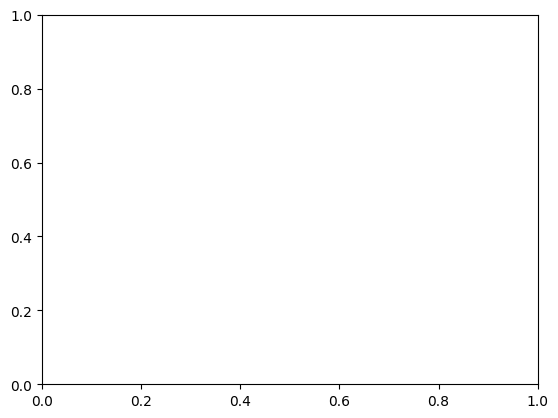

In [180]:
time_value = np.arange(0, df.shape[1] - 1) / 125
row = df.iloc[5, :-1]

for row in df[:59]
plt.plot(time_value, row)

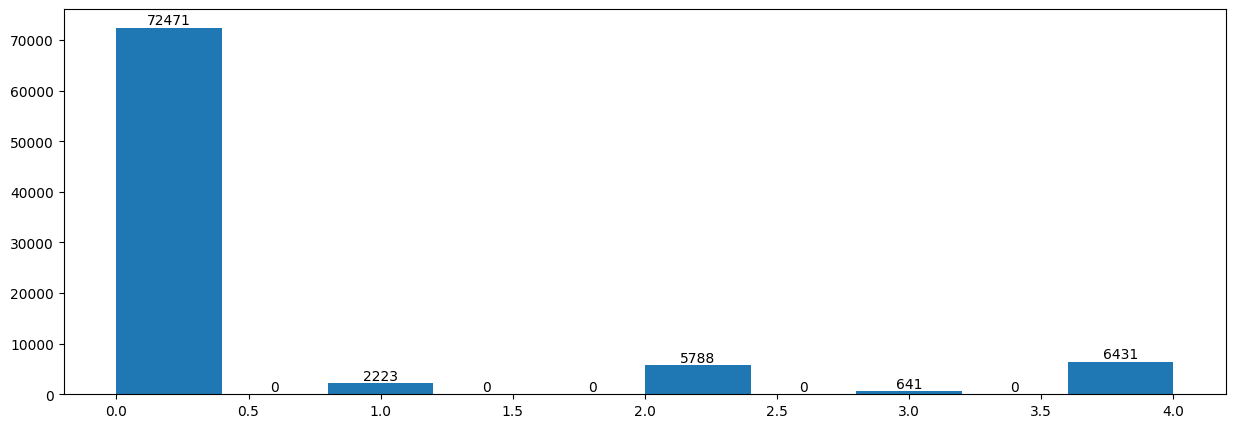

In [38]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

plt.figure(figsize = (15,5))
counts, edges,bars = plt.hist(y)
plt.bar_label(bars)
plt.show()

Without smote or removing normal beat data

In [171]:
from xgboost import XGBClassifier
bst = XGBClassifier()
bst.fit(X, y,)
test = pd.read_csv(test_set_filepath, header = None)
test_X = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

In [172]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

predictions = bst.predict(test_X)
accuracy = accuracy_score(predictions, test_y)
print(confusion_matrix(test_y, predictions))
print(accuracy)

[[18074    21    16     1     6]
 [  169   380     6     0     1]
 [   88     2  1338    15     5]
 [   33     0    13   116     0]
 [   40     1     3     0  1564]]
0.9808149095560021


# Trying with reducing

In [170]:
# reduced_df = df[].sample(n=7000, random_state = 50)
df = df.rename(columns = {187: 'label'})
excess_class = df[df['label'] == 0]
sample = excess_class.sample(n=5000, random_state = 50, ignore_index = True)
other_classes = df[df['label'] != 0]
bruh = pd.concat([sample, other_classes], axis = 0, ignore_index = True)

bruh_X = bruh.iloc[:, :-1]
bruh_y = bruh.iloc[:, -1]
bruh_bst = XGBClassifier(objective='multi:softmax')
bruh_bst.fit(bruh_X, bruh_y)
bruhdictions = bruh_bst.predict(test_X)
accuracy = accuracy_score(bruhdictions, test_y)
print(confusion_matrix(test_y, bruhdictions))
print(accuracy)

[[17350   329   272    71    96]
 [   83   455    14     0     4]
 [   22     6  1398    15     7]
 [   14     1    18   129     0]
 [   16     2     6     0  1584]]
0.9554175041110908


# Trying with Smote after Reducing

In [169]:
from imblearn.over_sampling import SMOTE
# from sklearn.metrics
smb = SMOTE(random_state = 50)
bru_res_X, bru_res_y = smb.fit_resample(bruh_X, bruh_y)
bru_2 = XGBClassifier(objective='multi:softprob')
bru_2.fit(bru_res_X, bru_res_y)
predz = bru_2.predict(test_X)
accuracy = accuracy_score(predz, test_y)
f1 = f1_score(test_y, predz, average = 'weighted')
print(f"accuracy: {accuracy}\nf1: {f1}")
print(confusion_matrix(test_y, predz))

accuracy: 0.9417138680796638
f1: 0.9484271545378364
[[17028   568   240   202    80]
 [   67   475     8     4     2]
 [   25     6  1392    21     4]
 [   10     1    12   139     0]
 [   11     6     7     2  1582]]


# Trying with smote

In [94]:
kk = 50000
sm = SMOTE(sampling_strategy={1: kk, 2: kk, 3: kk, 4: kk},random_state = 50)
X_res, y_res = sm.fit_resample(X, y)

In [95]:
smote_bst = XGBClassifier(objective='multi:softprob')
smote_bst.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [97]:
smote_preds = smote_bst.predict(test_X)
accuracy = accuracy_score(smote_preds, test_y)
print(confusion_matrix(test_y, smote_preds))
print(accuracy)

[[17751   221    70    56    20]
 [  112   435     4     2     3]
 [   64     5  1359    16     4]
 [   15     0    11   136     0]
 [   24     3     7     1  1573]]
0.9708569340398319


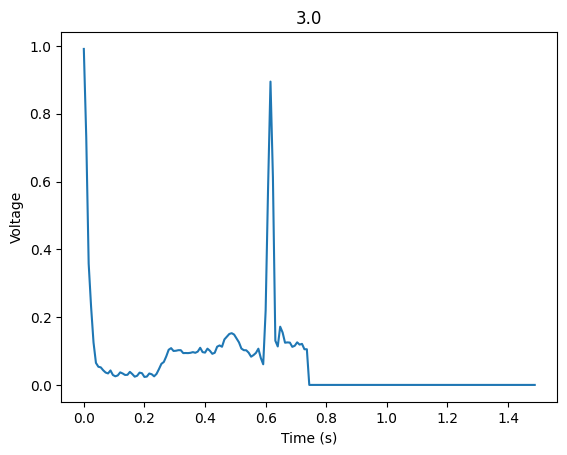

In [145]:
testx = 100000
synthetic_samples = X_res.iloc[len(X):, :]
synthetic_samples_y = y_res.iloc[len(y):]
fake = synthetic_samples.iloc[testx, :]
# bru = X_res[45]
plt.plot(time_value, fake)
plot.title(synthetic_samples_y.iloc[testx])
plot.xlabel("Time (s)")
plot.ylabel("Voltage")
plot.show()

In [146]:
len(X_res)

272471

# Visualizations

In [162]:
# Smoted data visualizations
plt.figure(figsize(15, 8))
for bro in synthetic_samples[:10].itertuples():
    plt.plot(range(len(bro


SyntaxError: '(' was never closed (3915973366.py, line 2)